c:\users\jojo3\.conda\envs\2021-topic-04-team-02\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


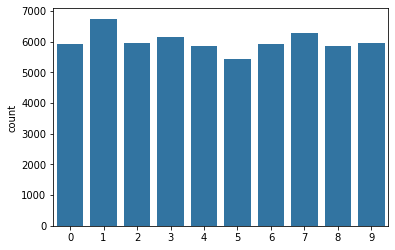

In [23]:
import seaborn as sns
import pickle
with open('data/train_points.p', 'rb') as f:
    X = pickle.load(f)
labels = X[:,0]
values = X[:,1:]
sns.countplot(labels, color = sns.color_palette()[0]);

In [47]:
with open('data/test_points.p', 'rb') as f:
    Y = pickle.load(f)
testvalues = Y[:,1:]
testlabels = Y[:,0]
testvalues.shape

(9999, 784)

![pickleUrl](https://media1.tenor.com/images/1756eb5631ade0eb64d57d256a5847f2/tenor.gif)

In [38]:
from scipy.stats import mode
k=100
def predict(x):
    differences = (values - x)
    distances = np.einsum('ij, ij->i', differences, differences)
    nearest = labels[np.argsort(distances)[:k]]
    return mode(nearest)[0][0]

In [62]:
sample = 100
predicted_value = predict(x=testvalues[sample,:])
labeled_value = testlabels[sample]
print(predicted_value, 'vs', labeled_value)

0 vs 0


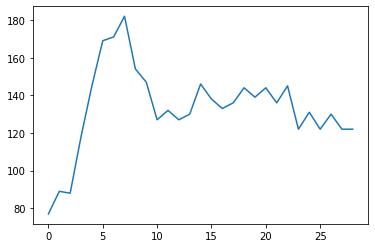

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
def I_turned_myself_into_a_pickle_morty(data,new_data_location):
    X = np.genfromtxt(data, delimiter=',').astype(np.dtype('uint8'))
    with open(new_data_location, 'wb') as f:
        pickle.dump(X, f)
    ...
    with open(new_data_location, 'rb') as f:
        X = pickle.load(f)
def do_pca(n_components, data): #does pca + data standardization I think?
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca
def load_the_training_pickle(pickleddata):
    with open(pickleddata, 'rb') as f:
        X = pickle.load(f)
    global trainlabels
    trainlabels = X[:,0]
    global trainvalues
    trainvalues = X[:,1:]
def load_the_testing_pickle(pickleddata):
    with open(pickleddata, 'rb') as f:
        Y = pickle.load(f)
    global testvalues
    testvalues = Y[:,1:]
    global testlabels
    testlabels = Y[:,0]
def predict(x):
    differences = (trainvalues_pca - x)
    distances = np.einsum('ij, ij->i', differences, differences)
    nearest = trainlabels[np.argsort(distances)[:k]]
    return mode(nearest)[0][0]

#K + Anzahl der Hauptkomponenten festlegen:
number_of_pcs = 59
k=105
hit = 0
miss = 0

load_the_training_pickle('data/train_points.p')
load_the_testing_pickle('data/test_points.p')
hits_per_pcn = []
for r in range(1,30):
    hit = 0
    pca, testvalues_pca = do_pca(r,testvalues)
    pca, trainvalues_pca = do_pca(r,trainvalues)
    for i in range(2500,2750): #PCA helps a lot
        sample = i
        predicted_value = predict(x=testvalues_pca[sample,:])
        labeled_value = testlabels[sample]
        if predicted_value == labeled_value:
            hit +=1
    hits_per_pcn.append(hit)
plt.plot(hits_per_pcn)
plt.show()